In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("_daily_report__202502212338.csv")

In [10]:
df.head()

,order_purchase_date,orders_count,customers_making_orders_count,revenue_usd,average_revenue_per_order_usd,top_3_product_categories_by_revenue,top_3_product_categories_revenue_percentage
0,2018-10-17,1,1.0,NaN,NaN,NaN,NaN
1,2018-10-16,1,0.0,NaN,NaN,NaN,NaN
2,2018-10-03,1,0.0,NaN,NaN,NaN,NaN
3,2018-10-01,1,1.0,NaN,NaN,NaN,NaN
4,2018-09-29,1,0.0,NaN,NaN,NaN,NaN


In [11]:
df["order_purchase_date"] = pd.to_datetime(df["order_purchase_date"])


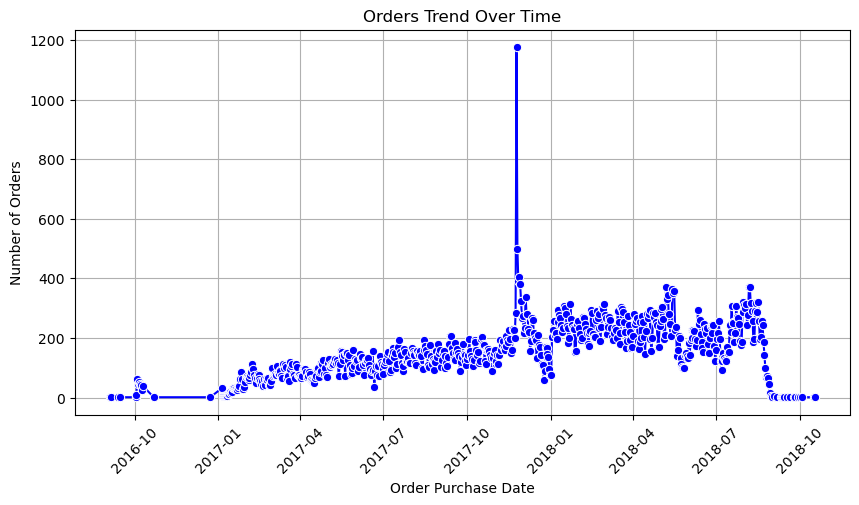

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["order_purchase_date"], y=df["orders_count"], marker="o", color="b")

plt.xlabel("Order Purchase Date")
plt.ylabel("Number of Orders")
plt.title("Orders Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


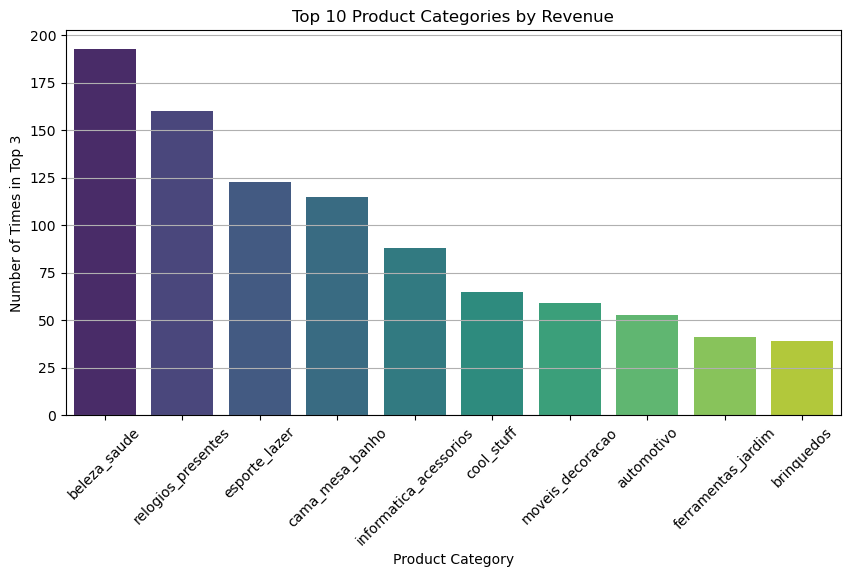

In [17]:
if df["top_3_product_categories_by_revenue"].notnull().any():
    from collections import Counter

    # Flatten the list of categories (after removing NaNs)
    category_list = df["top_3_product_categories_by_revenue"].dropna().str.split(", ").explode()

    # Count occurrences
    category_counts = Counter(category_list)

    # Convert to DataFrame for plotting
    cat_df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"])
    cat_df = cat_df.sort_values(by="Count", ascending=False).head(10)  # Keep only the top 10

    # Plot Top 10 Categories
    plt.figure(figsize=(10, 5))
    sns.barplot(x=cat_df["Category"], y=cat_df["Count"], palette="viridis")

    plt.xlabel("Product Category")
    plt.ylabel("Number of Times in Top 3")
    plt.title("Top 10 Product Categories by Revenue")
    plt.xticks(rotation=45)
    plt.grid(axis="y")

    plt.show()
